# Building Modelling Project
#### with Christian Ghiaus

#### FINAL REPORT

- Bin GUO
- Katarina FERREIRA
- Maria Luiza LORENZO
- Sara IZADI
- Wiam RAZI

#### SEM / SGB






#### 1. Introduction


The demand for energy rises constantly worldwide. It has become an urgent matter for many sectors to try to reduce their energy consumption. The building sector is one of the most important ones in this discussion, corresponding to almost 40% of the energy consumption and carbon emissions worldwide [1], and most of the energy used in
building is usually used for thermal comfort and air quality. 


![global_share_building_sector.png](global_share_building_sector.png)

Building modelling is therefore of great importance, because it can provide very accurate energy consumption data for a set of defined input criteria, that can then be optimized in order to reduce the thermal losses and the energy consumption of the studied case.  

The purpose of this project is the estimation of energy efficiency of a smart home by modelling and simulating a building plan, using a Python code. 


#### 2. Building Plan

To start the project, the model of the building has to be set, more specifically the sizing of the apartment that is going to be studied. For this project, a studio of 18m² was set, with a 3m² bathroom and a window. Figure 1 shows the model of this apartment, with all the dimensions in meters.

![building_model.jpg](building_model.jpg)

The walls of the apartment are composed of an inside layer of insulation material, and an outside layer of concrete, except the bathroom walls that are inside the apartment. The doors are composed of wood and the window is composed of glass. On the two sides of the apartment are other studios, and the door connects to the hallway.

#### 3. Hypothesis

In order to perform this study, some hypotesis had to be made. Those were:
   - The temperature distribution is homogenous inside the ambient.
   - The heat transfer is considered as a linear and one-dimensional process.
   - The temperature is uniform at the walls’ surface.
   - The heat exchange by long-wave irradiation between Walls and glasses are neglected (GLW → 0).
   
##### Parameters

Some parameters are set to calculate each heat exchange process. For this matter, we have to consider: 
- w is the width of the material, m;
- 𝜆 is the thermal conductivity, W/m K;
- S - surface area of the wall, m²;
- h is the convection coefficient, W/m² K;
- ℎ𝑜 = 10 W/m² K is the convection from wall to outdoor air;
- ℎ𝑖 = 4 W/m2K is the convection from wall to indoor air;
- Concrete: 𝜆𝑐 = 2.00 W mK⁄ ; 𝑤𝑐 = 0.20 m; 𝜌𝑐 𝑐𝑐 = 2.5 ∙ 106 J K m2⁄
- Insulation: 𝜆𝑖 = 0.04 W mK⁄ ; 𝑤𝑖 = 0.08 m; 𝜌𝑖 𝑐𝑖 = 2.0 ∙ 106 J K m2⁄
- Glass: 𝜆𝑔 = 1.2 W mK⁄ ; 𝑤𝑔 = 0.01 m; 𝜌𝑔 𝑐𝑔 = 2.0 ∙ 106 J K m2
- L_w = 6m is the length of the cubic room;
- W_w = 3m is the width of the cubic room 
- H_w = 3m is the high of the cubic room 
- Sg = 1m² is the surface of the glass wall 
- Sc1 = Si1 = 6 * 3m² surface of concrete & insulation of the first wall. 
- Sc2 = Si2 = 3 * 3 - 1 * 1 surface of concrete & insulation of the second wall. 
- Sc3 = Si3 = 6 * 3 surface of concrete & insulation of the third wall. 
- Sc4 = Si4 = 3 * 3 - 1 * 2.1 surface of concrete & insulation of the fourth wall. 
- Sc5 = Si5 = 1.5 * 3 + 2 * 3 - 1 * 2.1 surface of concrete & insulation of the fifth wall. 
- Va = L_w * W_w * H_w m³ is the volume of air 
- ACH = 1 represents the air changes per hour 
- Va_dot = ACH * Va / 3600 m³/s is the air infiltration

#### 4. Thermal Model


The thermal model is designed to represent the heat flux exchanges in the studied surfaces. The model is done by following a procedure. First, the control surfaces are represented on a schematic. Then, the relevant heat transfers must be identified. The next step is to connect the temperatures by resistances along the heat transfer paths, and adding storage and sources. The schematic diagram is shown in Figure 2, with which the problem can be solved more easily, what will be explained further on.

![ThermalScheme.jpg](ThermalScheme.jpg)

The heat phenomenons that can happen are: 
- Convection: A diffusion and mass transfer mechanism that occurs inside a material. The resistance for convection is given by: 
![convection.png](convection.png)

- Conduction: A diffusion mechanism  that occurs inside a material. The resistance for convection is given by:  
![conduction.png](conduction.png)

In order to construct the thermal model, the lines and the nodes were enumerated in ascending order from top to bottom. Each line was explained in the sequence. 

The First line concerns the first wall enumerated in Fig. 1, this wall is in contact with outside air. Therefore, it can be seen in the thermal model a first contribution of convection between the air and the surface outside (resistance 0), then 1 and 2 are the conduction inside the concrete, and 3 and 4 are the contributions of conduction is the insulation material. Finally, the Fifth resistance concerns the convection between the surface inside and the air in the room. Line 2 concerns the heat transfer that occurs in the window, we have therefore the convection with outside air, and the two conductions inside the glass. Two resistances are shown because in this type of model it is usual to represent the conduction from outside until the middle of the material and from the middle to the inside.

Line 3 has a very similar construction as line 1, because it also concerns a heat transfer going through the concrete and insulation materials. The only difference is that this wall, the third one in Fig. 1, is in contact with the air from the hallway. In this wall there is a door, therefore it is necessary to compute the heat transfer from this component. In Building Modelling normally it is assumed a general resistance for doors, that is why there is only one resistance for all the heat transfer in Line 4. 

Finally, the contribution of the bathroom was taken into account. Line 5 concerns wall 5 in Fig. 1. In this wall we have convection with the air inside the room, then conduction through the concrete and the insulation. Line 6 concerns the bathroom door, and is constructed just as Line 4. In node five the room and the bathroom are connected in what represents the temperature in the middle of the room, which suffers influences from both spaces.


#### 5. Mathematical model

To represent the important parameters and the relations in the system, some matrices are important. They are explained in the sequence. 

The incidence matrix A shows how the temperature nodes are connected to each other, it has a number of lines equal to the number of flows and the number of columns equal to the number of nodes. During the design of the thermal model, a direction of the flow has to be defined. If the flow is in the same direction as the path from the branch, the coefficient in the A matrix will be 1, and if they are in opposite directions, the coefficient will be -1. 

The Conductance matrix G is a diagonal matrix that contains the conductances. The elements of the diagonal are the inverse of the conduction and convection resistances. 

The Capacity Matrix C, is also a diagonal matrix containing the capacities of the walls. The values are defined by the dimensions and materials chosen. The dimension of the matrix is given by the number of nodes in the diagram. For the nodes that are connected to a capacity, the C matrix element corresponds to the following equation. 

![Cmatrix.png](Cmatrix.png)

The f and b matrices represent the constraints imposed on the model. In the matrix f, the nodes where there is a source are marked. In matrix b, the branches connected to a temperature are marked. 

#### 6. Model implementation in Python

The matrix A is: 
[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [-1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. -1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -1.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  

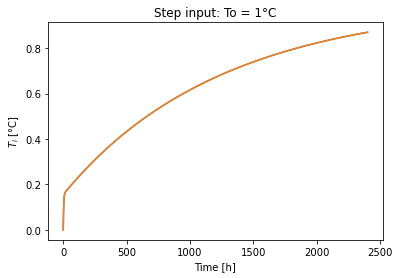


Steady-state indoor temperature obtained with:
- DAE model: 1.0000 °C
- response to step input:0.8702 °C


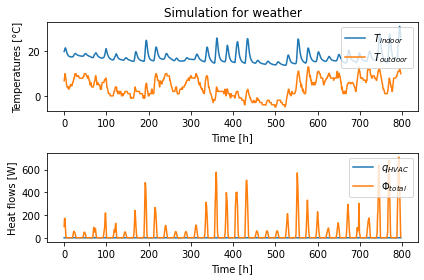

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import dm4bem
from dm4bem import read_epw, sol_rad_tilt_surf


# P-controler gain
Kp = 0           # no controller Kp -> 0

L_w = 6             # m length of the cubic room  
W_w = 3             # m width of the cubic room
H_w = 3             # m high of the cubic room

Sg = 1 ** 2           # m² surface of the glass wall
Sc1 = Si1 = 6 * 3     # m² surface of concrete & insulation of the 5 walls
Sc2 = Si2 = 3 * 3 - 1 * 1
Sc3 = Si3 = 6 * 3 
Sc4 = Si4 = 3 * 3 - 1 * 2.1
Sc5 = Si5 = 1.5 * 3 + 2 * 3 - 1 * 2.1

Va = L_w * W_w * H_w     # m³ volume of air
ACH = 1                  # air changes per hour
Va_dot = ACH * Va / 3600    # m³/s air infiltration

air = {'Density': 1.2,                      # kg/m³
        'Specific heat': 1000}
wall = {'Conductivity': [2, 0.04, 1.2],  # W/m.K
        'Density': [2300, 55, 2500],        # kg/m³
        'Specific heat': [880, 1210, 750],  # J/kg.K
        'Width': [0.2, 0.08, 0.01],
        'Surface': [Sc1+Sc2+Sc3+Sc4+Sc5, Sc1+Sc2+Sc3+Sc4+Sc5, Sg],  # m²
        'Slices': [4, 2, 1]}                # number of discretizations

wall = pd.DataFrame(wall, index=['Concrete', 'Insulation', 'Glass'])
wall

ε_wLW = 0.9     # long wave wall emmisivity (concrete)
α_wSW = 0.2     # absortivity white surface
ε_gLW = 0.9     # long wave glass emmisivity (glass pyrex)
τ_gSW = 0.83    # short wave glass transmitance (glass)
α_gSW = 0.1     # short wave glass absortivity
σ = 5.67e-8     # W/m².K⁴ Stefan-Bolzmann constant
Fwg = 1 / 5     # view factor wall - glass
Tm = 20 + 273   # mean temp for radiative exchange

# convection coefficients, W/m² K
h = pd.DataFrame([{'in': 4., 'out': 10}])

# Conduction
G_cd = wall['Conductivity'] / wall['Width'] * wall['Surface']

# Convection
Gw = h * wall['Surface'][0]     # wall
Gg = h * wall['Surface'][2]     # glass

# Long-wave radiation exchnage
GLW1 = ε_wLW / (1 - ε_wLW) * wall['Surface']['Insulation'] * 4 * σ * Tm**3
GLW2 = Fwg * wall['Surface']['Insulation'] * 4 * σ * Tm**3
GLW3 = ε_gLW / (1 - ε_gLW) * wall['Surface']['Glass'] * 4 * σ * Tm**3

# long-wave exg. wall-glass
GLW = 1 / (1 / GLW1 + 1 / GLW2 + 1 / GLW3)

# ventilation & advection
Gv = Va_dot * air['Density'] * air['Specific heat']

# glass: convection outdoor & conduction
# Ggs = float(1 / (1 / Gg['out'] + 1 / (2 * G_cd['Glass'])))
# C = wall['Density'] * wall['Specific heat'] * wall['Surface'] * wall['Width']
# C['Air'] = air['Density'] * air['Specific heat'] * Va

print("The matrix A is: ")  
A = np.zeros([22,18])
A[0, 0] = 1
A[1, 0], A[1, 1] = -1, 1
A[2, 1], A[2, 2] = -1, 1
A[3, 2], A[3, 3] = -1, 1
A[4, 3], A[4, 4] = -1, 1
A[5, 4], A[5, 5] = -1, 1
A[6, 6] = 1
A[7, 6], A[7, 7] = -1, 1
A[8, 7], A[8, 5] = -1, 1
A[9, 8] =  1
A[10, 8], A[10, 9] = -1,1
A[11, 9], A[11,10] = -1, 1
A[12, 10], A[12, 11] = -1, 1
A[13, 11], A[13, 12] = -1, 1
A[14, 12], A[14, 5] = -1, 1
A[15,5] =  1
A[16, 5], A[16, 13] = -1, 1
A[17, 13], A[17, 14] = -1, 1
A[18, 14], A[18, 15] = -1, 1
A[19, 15],A[19,16] = -1, 1
A[20, 16], A[20, 17] = -1, 1
A[21, 17], A[21, 5] = -1, -1
np.set_printoptions(suppress=False)
print(A)

print("\nThe matrix G is: ")
lambda_c = 2
lambda_i = 0.04
lambda_g = 1.2
hi = 4
h0 = 10
H_door = 2.1
W_door = 1
W_batheroom = 1.5 + 2
S_door = H_door*W_door

g=[h0*Sc2,
    (lambda_c*Sc2)/W_w,
    (lambda_c*Sc2)/W_w,
    (lambda_i*Si2)/W_w,
    (lambda_i*Si2)/W_w,
    hi*Si2,
    h0*Sg,
    (lambda_g*Sg)/1,
    hi*Sg,
    h0*Sc4,
    (lambda_c*Sc4)/W_w,
    (lambda_c*Sc4)/W_w,
    (lambda_i*Si4)/W_w,
    (lambda_i*Si4)/W_w,
    hi*Si4,
    Kp,
    hi*Sc5,
    (lambda_c*Sc5)/W_batheroom,
    (lambda_c*Sc5)/W_batheroom,
    (lambda_i*Si5)/W_batheroom,
    (lambda_i*Si5)/W_batheroom, 
    Kp]
G = np.diag(g)
print(G)

print("\nThe matrix C is ")
density_c = 2300
density_i = 55
density_g = 2500
density_air = 1.2
specific_heat_air = 1000
specific_heat_c = 880
specific_heat_i = 1210
specific_heat_g = 750
width_c = 0.2
width_i = 0.08
width_g = 0.01

c_concrete2 = density_c*specific_heat_c* (width_c*W_w*H_w-1*width_g*1)
c_isolation2 = density_i*specific_heat_i*(width_i*W_w*H_w-1*width_g*1)

c_concrete4 = density_c*specific_heat_c* (width_c*W_w*H_w-width_c*1*2.1)
c_isolation4 = density_i*specific_heat_i*(width_i*W_w*H_w-width_c*1*2.1)

c_concrete5 = density_c*specific_heat_c* (width_c*W_batheroom*H_w-width_c*1*2.1)
c_isolation5 = density_i*specific_heat_i*(width_i*W_batheroom*H_w-width_c*1*2.1)

c_air = density_air*specific_heat_air*Va

c=np.zeros([18,18])
c[0,0] = 0
c[1,1] = c_concrete2
c[2,2] = 0 
c[3,3] = c_isolation2
c[4,4] = 0
c[5,5] = c_air
c[6,6] = 0
c[7,7] = 0
c[8,8] = 0
c[9,9] = c_concrete4
c[10,10] = 0
c[11,11] = c_isolation4
c[12,12] = 0
c[13,13] = 0
c[14,14] = c_concrete5
c[15,15] = 0
c[16,16] = c_isolation5
c[17,17] = c_air
print(c)

b = np.zeros(22) #is about resistanc branch
b[[0, 6, 9, 15]] = 21
f = np.zeros(18) #nodes
f[[0, 5, 6, 8, 12, 13, 17]] = 0 + np.array([0, 0, 0, 0, 0, 0, 0])
                                  
y = np.ones(18)

u = np.hstack([b[np.nonzero(b)], f[np.nonzero(f)]])
print('\nThe vector b is :' )
print(b)

print('\nThe vector f is :' )
print(f)

print('\nThe vector u is :')
print(u)

#state-space model

[As, Bs, Cs, Ds] = dm4bem.tc2ss(A, G, b, c, f, y)

yss = (-Cs @ np.linalg.inv(As) @ Bs + Ds) @ u
ytc = np.linalg.inv(A.T @ G @ A) @ (A.T @ G @ b + f)

print(np.array_str(yss, precision=3, suppress_small=True))
print(np.array_str(ytc, precision=3, suppress_small=True))
print(f'\nMax error in steady-state between thermal circuit and state-space: {max(abs(yss - ytc)):.2e}')

#DYNAMIC SIMULATION
b = np.zeros(22)
b[[0, 6, 9, 15]] = 1

f = np.zeros(18) #nodes
f[[0,5, 6, 8, 12, 13,17]] = 1

y = np.zeros(18)
y[[5]] = 1

[As, Bs, Cs, Ds] = dm4bem.tc2ss(A, G, b, c, f, y)

#time step
dtmax = min(-2. / np.linalg.eig(As)[0])
print(f'\nMaximum time step: {dtmax:.2f} s')
dt = 360

#response time
print('\nThe matrix Cs is: ')
print(Cs)

duration = 3600 * 24 * 100        # [s]
n = int(np.floor(duration / dt))
t = np.arange(0, n * dt, dt)    # time
# Vectors of state and input (in time)
n_tC = As.shape[0]              # no of state variables (temps with capacity)
# u = [To To To Tsp Phio Phii Qaux Phia]
u = np.zeros([11, n])
u[0:4, :] = np.ones([4, n])
temp_exp = np.zeros([n_tC, t.shape[0]])
temp_imp = np.zeros([n_tC, t.shape[0]])

I = np.eye(n_tC)
for k in range(n - 1):
    temp_exp[:, k + 1] = (I + dt * As) @\
        temp_exp[:, k] + dt * Bs @ u[:, k]
    temp_imp[:, k + 1] = np.linalg.inv(I - dt * As) @\
        (temp_imp[:, k] + dt * Bs @ u[:, k])

y_exp = Cs @ temp_exp + Ds @  u
y_imp = Cs @ temp_imp + Ds @  u

fig, ax = plt.subplots()
ax.plot(t / 3600, y_exp.T, t / 3600, y_imp.T)
ax.set(xlabel='Time [h]',
        ylabel='$T_i$ [°C]',
        title='Step input: To = 1°C')
plt.show()

b = np.zeros(22)
b[[0, 6, 9, 15]] = 1
f = np.zeros(18)

ytc = np.linalg.inv(A.T @ G @ A) @ (A.T @ G @ b + f)
print('\nSteady-state indoor temperature obtained with:')
print(f'- DAE model: {ytc[6]:.4f} °C')
print(f'- response to step input:{float(y_exp[:, -2]):.4f} °C')

#weather data
filename = 'FRA_Lyon.074810_IWEC.epw'
start_date = '2000-01-03 12:00:00'
end_date = '2000-02-05 18:00:00'

# # Read weather data from Energyplus .epw file
[data, meta] = dm4bem.read_epw(filename, coerce_year=None)
weather = data[["temp_air", "dir_n_rad", "dif_h_rad"]]
del data
weather.index = weather.index.map(lambda t: t.replace(year=2000))
weather = weather[(weather.index >= start_date) & (
    weather.index < end_date)]

surface_orientation = {'slope': 90,
                        'azimuth': 0,
                        'latitude': 45}
albedo = 0.2
rad_surf1 = dm4bem.sol_rad_tilt_surf(weather, surface_orientation, albedo)
rad_surf1['Φt1'] = rad_surf1.sum(axis=1)

data = pd.concat([weather['temp_air'], rad_surf1['Φt1']], axis=1)
data = data.resample(str(dt) + 'S').interpolate(method='linear')
data = data.rename(columns={'temp_air': 'To'})

data['Ti'] = 20 * np.ones(data.shape[0])
data['Qa'] = 0 * np.ones(data.shape[0])

t = dt * np.arange(data.shape[0])

u = pd.concat([data['To'], data['To'], data['To'], data['Ti'],
                α_wSW * wall['Surface']['Concrete'] * data['Φt1'],
                τ_gSW * α_wSW * wall['Surface']['Glass'] * data['Φt1'],
                data['Qa'],data['Qa'],data['Qa'],data['Qa'],
                α_gSW * wall['Surface']['Glass'] * data['Φt1']], axis=1)

temp_exp = 20 * np.ones([As.shape[0], u.shape[0]])

for k in range(u.shape[0] - 1):
    temp_exp[:, k + 1] = (I + dt * As) @ temp_exp[:, k]\
          + dt * Bs @ u.iloc[k, :]
  
y_exp = Cs @ temp_exp + Ds @ u.to_numpy().T
q_HVAC = Kp * (data['Ti'] - y_exp[0, :])

fig, axs = plt.subplots(2, 1)

# plot indoor and outdoor temperature
axs[0].plot(t / 3600, y_exp[0, :], label='$T_{indoor}$')
axs[0].plot(t / 3600, data['To'], label='$T_{outdoor}$')
axs[0].set(xlabel='Time [h]',
            ylabel='Temperatures [°C]',
            title='Simulation for weather')
axs[0].legend(loc='upper right')

# plot total solar radiation and HVAC heat flow
axs[1].plot(t / 3600,  q_HVAC, label='$q_{HVAC}$')
axs[1].plot(t / 3600, data['Φt1'], label='$Φ_{total}$')
axs[1].set(xlabel='Time [h]',
            ylabel='Heat flows [W]')
axs[1].legend(loc='upper right')

fig.tight_layout()

#### 7. Results and Analysis


It can be seen from the plotted figures that the temperatures follow the same behaviour, resulting in a similarity in the format of the curves. That is, the temperature inside the room increases when the outdoor temperature increases and vice versa. However, one can note by the graph that the indoor temperatures are bigger. That could be explained because the solar radiation provides additional heat to the system. 

#### 8. Conclusion 

The simulations performed in this study are very important in order to analyze and manage energy consumption. However, these simulations are done under a steady state hypothesis, which doesn't occur in reality. Also, some simplification hypothesis were made, in order to simplify the model, generating losses in accuracy. Still, the imposed objectives of this project were fulfilled, and the group managed to deliver a simulation of a building plan using a Python code. 


#### 9. References

[1] GLOBAL STATUS REPORT FOR BUILDINGS AND CONSTRUCTION, 2020. Available on:  https://wedocs.unep.org/bitstream/handle/20.500.11822/34572/GSR_ES.pdf